In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = 'gdrive/Shared drives/Predictive Fall 2019/GRevenue data/'

In [0]:
## Test data

In [0]:
test_original=pd.read_csv(path + "testv2_wo_hitsDim.csv",dtype='str',parse_dates=['date'])

In [0]:
test_original = test_original[['channelGrouping', 'date', 'fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'deviceCategory',
       'isMobile', 'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'bounces', 'hits',
       'newVisits', 'pageviews', 'sessionQualityDim', 'timeOnSite',
       'totalTransactionRevenue', 'transactionRevenue', 'transactions',
       'adContent', 'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.isVideoAd', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source']]

In [68]:
test_original.head(5)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,2018-05-11,7460955084541987166,1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,NaN,4,NaN,3,1,973,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,Direct,2018-05-11,460252456180441002,1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,4,NaN,3,1,49,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,Organic Search,2018-05-11,3461808543879602873,1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,NaN,4,NaN,3,1,24,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
3,Direct,2018-05-11,975129477712150630,1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,NaN,5,NaN,4,1,25,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
4,Organic Search,2018-05-11,8381672768065729990,1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,NaN,5,1,4,1,49,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google


In [71]:
import sklearn
from sklearn.preprocessing import LabelEncoder

cat_cols = ["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", 
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", 
            "referralPath", "source",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect']


for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(test_original[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    test_original[col] = lbl.transform(list(test_original[col].values.astype('str')))

channelGrouping
browser
deviceCategory
operatingSystem
city
continent
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
adwordsClickInfo.slot
campaign
keyword
medium
referralPath
source
adwordsClickInfo.isVideoAd
isTrueDirect


In [0]:
num_cols = ["hits", "pageviews", "visitNumber", "visitStartTime", 'bounces', 'newVisits']    
for col in num_cols:
    test_original[col] = train[col].astype(float)

In [73]:
test_clean = test_original.drop(['bounces','newVisits','adwordsClickInfo.isVideoAd','adwordsClickInfo.slot','transactions'], axis=1)
test_clean.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'browser', 'deviceCategory', 'isMobile',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'hits', 'pageviews',
       'sessionQualityDim', 'timeOnSite', 'totalTransactionRevenue',
       'transactionRevenue', 'adContent', 'adwordsClickInfo.adNetworkType',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.page', 'campaign',
       'isTrueDirect', 'keyword', 'medium', 'referralPath', 'source'],
      dtype='object')

In [74]:
test_clean.isna().sum()

channelGrouping                        0
date                                   0
fullVisitorId                          0
visitId                                0
visitNumber                            0
visitStartTime                         0
browser                                0
deviceCategory                         0
isMobile                               0
operatingSystem                        0
city                                   0
continent                              0
country                                0
metro                                  0
networkDomain                          0
region                                 0
subContinent                           0
hits                                   0
pageviews                             56
sessionQualityDim                      0
timeOnSite                        183686
totalTransactionRevenue           396995
transactionRevenue                396995
adContent                              0
adwordsClickInfo

In [0]:
sumCols = ['hits', 'pageviews', 'timeOnSite','transactionRevenue']

modeCols = ['channelGrouping','browser','deviceCategory','isMobile','operatingSystem',
            'city', 'continent', 'country', 'metro', 'networkDomain', 'region', 'subContinent',
            'adContent','adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
             'adwordsClickInfo.page','campaign','isTrueDirect','keyword','medium', 'referralPath', 'source']

meanCols = ['sessionQualityDim','hits', 'pageviews','timeOnSite']
sdCols = ['hits', 'pageviews']
# mean, sd ?

timeCol = ['visitStartTime']

In [76]:
max_dt = test_clean['date'].max()
min_dt = test_clean['date'].min()
max_dt,min_dt

(Timestamp('2018-10-15 00:00:00'), Timestamp('2018-05-01 00:00:00'))

In [0]:
test_clean['min_date'] = test_clean['date'].min()
test_clean['max_date'] = test_clean['date'].max()


In [0]:
test_clean_agg_sum = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date'])['hits', 'pageviews', 'timeOnSite','transactionRevenue'].sum()

In [0]:
test_clean_agg_mean = test_clean.groupby(['fullVisitorId''min_date','max_date'])['sessionQualityDim','hits', 'pageviews','timeOnSite'].mean()

In [0]:
test_clean_agg_med = test_clean.groupby(['fullVisitorId','min_date','max_date'])['channelGrouping','browser','deviceCategory','isMobile','operatingSystem',
            'city', 'continent', 'country', 'metro', 'networkDomain', 'region', 'subContinent',
            'adContent','adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
             'adwordsClickInfo.page','campaign','isTrueDirect','keyword','medium', 'referralPath', 'source'].median()

In [0]:
test_clean_agg_date = test_clean.groupby(['fullVisitorId','min_date','max_date']).agg({'date':['min','max']})

In [85]:
test_clean_agg_date.head(5)

date           
                                                 min        max
fullVisitorId       min_date   max_date                        
0000018966949534117 2018-05-01 2018-10-15 2018-08-13 2018-08-13
0000039738481224681 2018-05-01 2018-10-15 2018-06-13 2018-06-13
0000073585230191399 2018-05-01 2018-10-15 2018-06-03 2018-06-03
0000087588448856385 2018-05-01 2018-10-15 2018-06-06 2018-06-06
0000149787903119437 2018-05-01 2018-10-15 2018-05-21 2018-05-21

In [0]:
test_clean_agg_date.columns = test_clean_agg_date.columns.droplevel(0)

In [0]:
test_clean_agg_date=test_clean_agg_date.reset_index()

In [0]:
test_clean_agg_date['start_days']=test_clean_agg_date['min'] - test_clean_agg_date['min_date']
test_clean_agg_date['end_days']=test_clean_agg_date['max_date'] - test_clean_agg_date['max']

In [89]:
test_clean_agg_date.head(3)

,fullVisitorId,min_date,max_date,min,max,start_days,end_days
0,0000018966949534117,2018-05-01,2018-10-15,2018-08-13,2018-08-13,104 days,63 days
1,0000039738481224681,2018-05-01,2018-10-15,2018-06-13,2018-06-13,43 days,124 days
2,0000073585230191399,2018-05-01,2018-10-15,2018-06-03,2018-06-03,33 days,134 days


In [0]:
test_clean_agg_date=test_clean_agg_date.drop(columns=['min','max'])

In [0]:
test_clean_agg1=test_clean_agg_sum.merge(test_clean_agg_mean,how='inner',
                          on =( ['fullVisitorId','min_date','max_date']))

In [110]:
test_clean_agg1.head(5)

,,,hits_x,pageviews_x,hits_y,pageviews_y
fullVisitorId,min_date,max_date,,,,
0000018966949534117,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0
0000039738481224681,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0
0000073585230191399,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0
0000087588448856385,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0
0000149787903119437,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0


In [0]:
test_clean_agg2=test_clean_agg1.merge(test_clean_agg_med,how='inner',
                          on =( ['fullVisitorId','min_date','max_date']))

In [95]:
test_clean_agg2.head(5)

,,,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source
fullVisitorId,min_date,max_date,,,,,,,,,,,,,,,,,,,,,,,,,
0000018966949534117,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0,4.0,25.0,0.0,7.0,391.0,2.0,200.0,69.0,0.0,37.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0
0000039738481224681,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,2.0,25.0,1.0,1.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0
0000073585230191399,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,4.0,53.0,1.0,21.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0
0000087588448856385,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,4.0,25.0,0.0,18.0,502.0,3.0,185.0,81.0,13806.0,268.0,6.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0
0000149787903119437,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0,4.0,25.0,1.0,1.0,502.0,4.0,163.0,81.0,13499.0,268.0,19.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0


In [0]:
test_clean_agg2=test_clean_agg2.reset_index()

In [0]:
test_clean_agg3= test_clean_agg2.merge(test_clean_agg_date,how='inner',
                          on =( ['fullVisitorId','min_date','max_date']))

In [100]:
test_clean_agg3.head(5)

,fullVisitorId,min_date,max_date,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days
0,0000018966949534117,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0,4.0,25.0,0.0,7.0,391.0,2.0,200.0,69.0,0.0,37.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,104 days,63 days
1,0000039738481224681,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,2.0,25.0,1.0,1.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,43 days,124 days
2,0000073585230191399,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,4.0,53.0,1.0,21.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,33 days,134 days
3,0000087588448856385,2018-05-01,2018-10-15,2.0,2.0,2.0,2.0,4.0,25.0,0.0,18.0,502.0,3.0,185.0,81.0,13806.0,268.0,6.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,36 days,131 days
4,0000149787903119437,2018-05-01,2018-10-15,1.0,1.0,1.0,1.0,4.0,25.0,1.0,1.0,502.0,4.0,163.0,81.0,13499.0,268.0,19.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,20 days,147 days


In [0]:
test_clean_agg3=test_clean_agg3.drop(columns=['min_date','max_date'])

In [102]:
test_clean_agg3.head(5)

,fullVisitorId,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days
0,0000018966949534117,1.0,1.0,1.0,1.0,4.0,25.0,0.0,7.0,391.0,2.0,200.0,69.0,0.0,37.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,104 days,63 days
1,0000039738481224681,2.0,2.0,2.0,2.0,2.0,25.0,1.0,1.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,43 days,124 days
2,0000073585230191399,2.0,2.0,2.0,2.0,4.0,53.0,1.0,21.0,502.0,2.0,200.0,81.0,0.0,268.0,12.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,33 days,134 days
3,0000087588448856385,2.0,2.0,2.0,2.0,4.0,25.0,0.0,18.0,502.0,3.0,185.0,81.0,13806.0,268.0,6.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,36 days,131 days
4,0000149787903119437,1.0,1.0,1.0,1.0,4.0,25.0,1.0,1.0,502.0,4.0,163.0,81.0,13499.0,268.0,19.0,0.0,2.0,9016.0,2.0,3.0,1.0,2.0,5.0,0.0,62.0,20 days,147 days


In [0]:
test_clean_agg3['start_days']=test_clean_agg3['start_days']/np.timedelta64(1, 'D')
test_clean_agg3['end_days']=test_clean_agg3['end_days']/np.timedelta64(1, 'D')

In [0]:
test_clean_agg3.to_csv(path + "visitor_agg_test.csv")

In [105]:
test_clean_agg3['fullVisitorId'].nunique()

296530

In [0]:
temp=pd.read_csv(path + "visitor_agg_test.csv",dtype='str')

In [107]:
temp['fullVisitorId'].nunique()

296530

In [0]:
percent_missing = test_clean_agg3.isnull().sum() * 100 / len(test_clean_agg3)
missing_value_df = pd.DataFrame({'column_name': test_clean_agg3.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [109]:
missing_value_df

,column_name,percent_missing
fullVisitorId,fullVisitorId,0.000000
source,source,0.000000
referralPath,referralPath,0.000000
medium,medium,0.000000
keyword,keyword,0.000000
isTrueDirect,isTrueDirect,0.000000
campaign,campaign,0.000000
adwordsClickInfo.page,adwordsClickInfo.page,0.000000
adwordsClickInfo.gclId,adwordsClickInfo.gclId,0.000000
adwordsClickInfo.adNetworkType,adwordsClickInfo.adNetworkType,0.000000


In [0]:
X=train_clean_agg3.drop(columns='transactionRevenue')

In [0]:
## Training data

In [0]:
train=pd.read_csv(path + "trainv2_wo_hitsDim.csv",dtype='str',parse_dates=['date'])

In [0]:
train = train[['channelGrouping', 'date', 'fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'deviceCategory',
       'isMobile', 'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'bounces', 'hits',
       'newVisits', 'pageviews', 'sessionQualityDim', 'timeOnSite',
       'totalTransactionRevenue', 'transactionRevenue', 'transactions',
       'adContent', 'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.isVideoAd', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source']]

In [15]:
train.head(2)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2,2,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com


In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder

cat_cols = ["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", 
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", 
            "referralPath", "source",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect']


for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str'))) # + list(test_df[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))

channelGrouping
browser
deviceCategory
operatingSystem
city
continent
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
adwordsClickInfo.slot
campaign
keyword
medium
referralPath
source
adwordsClickInfo.isVideoAd
isTrueDirect


In [0]:
num_cols = ["hits", "pageviews", "visitNumber", "visitStartTime", 'bounces', 'newVisits']    
for col in num_cols:
    train[col] = train[col].astype(float)

In [20]:
train.head(2)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,4,2017-10-16,3162355547410993243,1508198450,1.0,1.508198e+09,43,0,False,20,955,4,75,122,0,482,22,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,62,3,59008,1,11,3,4,1,3366,5,3196,99
1,6,2017-10-16,8934116514970143966,1508176307,6.0,1.508176e+09,35,0,False,3,220,2,218,100,0,73,12,NaN,2.0,NaN,2.0,2,28,NaN,NaN,NaN,62,3,59008,1,11,3,4,1,2746,6,300,301


In [0]:
#train = pd.read_csv("gtrain_df.csv",parse_dates=['date'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#import copy
#train_copy = train.copy(deep=True)

In [0]:
#train.head(3)

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,0,4,2017-10-16,3162355547410993243,1508198450,1.0,1.508198e+09,67,0,False,13,951,4,201,27,0,426,15,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,2631,5,3196,99
1,1,6,2017-10-16,8934116514970143966,1508176307,6.0,1.508176e+09,58,0,False,17,136,2,133,3,0,454,4,NaN,2.0,NaN,2.0,2.0,28.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,1,1942,6,300,301
2,2,2,2017-10-16,7992466427990357681,1508201613,1.0,1.508202e+09,58,1,True,1,951,2,133,27,34379,426,4,NaN,2.0,1.0,2.0,1.0,38.0,NaN,NaN,NaN,59,3,54456,1,3,3,27,0,1942,0,3196,0


In [0]:
#train = train.iloc[:,1:]

In [0]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'browser', 'deviceCategory', 'isMobile',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'bounces', 'hits',
       'newVisits', 'pageviews', 'sessionQualityDim', 'timeOnSite',
       'totalTransactionRevenue', 'transactionRevenue', 'transactions',
       'adContent', 'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.isVideoAd', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'campaign', 'isTrueDirect', 'keyword',
       'medium', 'referralPath', 'source'],
      dtype='object')

In [21]:
train_clean = train.drop(['bounces','newVisits','adwordsClickInfo.isVideoAd','adwordsClickInfo.slot','transactions'], axis=1)
train_clean.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'browser', 'deviceCategory', 'isMobile',
       'operatingSystem', 'city', 'continent', 'country', 'metro',
       'networkDomain', 'region', 'subContinent', 'hits', 'pageviews',
       'sessionQualityDim', 'timeOnSite', 'totalTransactionRevenue',
       'transactionRevenue', 'adContent', 'adwordsClickInfo.adNetworkType',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.page', 'campaign',
       'isTrueDirect', 'keyword', 'medium', 'referralPath', 'source'],
      dtype='object')

In [22]:
np.transpose(train_clean.describe())

,count,mean,std,min,25%,50%,75%,max
channelGrouping,1708337.0,4.489546e+00,1.730938e+00,0.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
visitNumber,1708337.0,2.335170e+00,9.354034e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.570000e+02
visitStartTime,1708337.0,1.498352e+09,1.624937e+07,1.470035e+09,1.482738e+09,1.499832e+09,1.512513e+09,1.525158e+09
browser,1708337.0,4.362238e+01,1.530903e+01,0.000000e+00,3.500000e+01,3.500000e+01,4.300000e+01,1.280000e+02
deviceCategory,1708337.0,3.524949e-01,5.521176e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
operatingSystem,1708337.0,1.253722e+01,8.426416e+00,0.000000e+00,7.000000e+00,7.000000e+00,2.000000e+01,2.300000e+01
city,1708337.0,7.327644e+02,3.053017e+02,0.000000e+00,5.400000e+02,9.550000e+02,9.550000e+02,9.550000e+02
continent,1708337.0,2.688868e+00,8.913773e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
country,1708337.0,1.629107e+02,6.932350e+01,0.000000e+00,9.600000e+01,2.100000e+02,2.180000e+02,2.270000e+02
metro,1708337.0,8.460899e+01,5.086727e+01,0.000000e+00,2.600000e+01,1.220000e+02,1.220000e+02,1.220000e+02


In [23]:
train_clean.isna().sum()

channelGrouping                         0
date                                    0
fullVisitorId                           0
visitId                                 0
visitNumber                             0
visitStartTime                          0
browser                                 0
deviceCategory                          0
isMobile                                0
operatingSystem                         0
city                                    0
continent                               0
country                                 0
metro                                   0
networkDomain                           0
region                                  0
subContinent                            0
hits                                    0
pageviews                             239
sessionQualityDim                  835274
timeOnSite                         874294
totalTransactionRevenue           1689823
transactionRevenue                1689823
adContent                         

In [0]:
sumCols = ['hits', 'pageviews', 'timeOnSite','transactionRevenue']

modeCols = ['channelGrouping','browser','deviceCategory','isMobile','operatingSystem',
            'city', 'continent', 'country', 'metro', 'networkDomain', 'region', 'subContinent',
            'adContent','adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
             'adwordsClickInfo.page','campaign','isTrueDirect','keyword','medium', 'referralPath', 'source']

meanCols = ['sessionQualityDim','hits', 'pageviews','timeOnSite']
sdCols = ['hits', 'pageviews']
# mean, sd ?

timeCol = ['visitStartTime']

In [27]:
max_dt = train_clean['date'].max()
min_dt = train_clean['date'].min()
max_dt,min_dt

(Timestamp('2018-04-30 00:00:00'), Timestamp('2016-08-01 00:00:00'))

In [0]:
train_clean['timeperiod'] = 651654

In [29]:
train_clean['timeperiod'][(train_clean['date']<=max_dt) & (train_clean['date']>(max_dt-pd.DateOffset(days=168)))] = 4
train_clean['timeperiod'][(train_clean['date']<=(max_dt-pd.DateOffset(days=168))) & (train_clean['date']>(max_dt-pd.DateOffset(days=168*2)))] = 3
train_clean['timeperiod'][(train_clean['date']<=(max_dt-pd.DateOffset(days=168*2))) & (train_clean['date']>(max_dt-pd.DateOffset(days=168*3)))] = 2
train_clean['timeperiod'][(train_clean['date']<=(max_dt-pd.DateOffset(days=168*3))) & (train_clean['date']>(max_dt-pd.DateOffset(days=168*4)))] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [30]:
train_clean['timeperiod'].unique()

array([3, 1, 4, 2])

In [31]:
train_clean[train_clean['timeperiod']==1]['date'].max(), train_clean[train_clean['timeperiod']==1]['date'].min()

(Timestamp('2016-12-12 00:00:00'), Timestamp('2016-08-01 00:00:00'))

In [32]:
train_clean.head(2)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,hits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,timeperiod
0,4,2017-10-16,3162355547410993243,1508198450,1.0,1.508198e+09,43,0,False,20,955,4,75,122,0,482,22,1.0,1.0,1,NaN,NaN,NaN,62,3,59008,11,4,1,3366,5,3196,99,3
1,6,2017-10-16,8934116514970143966,1508176307,6.0,1.508176e+09,35,0,False,3,220,2,218,100,0,73,12,2.0,2.0,2,28,NaN,NaN,62,3,59008,11,4,1,2746,6,300,301,3


In [33]:
train_clean['min_date'] = pd.to_datetime('2000-01-01')
train_clean['max_date'] = pd.to_datetime('2000-01-01')
train_clean['min_date'][train_clean['timeperiod']==4] = train_clean[train_clean['timeperiod']==4]['date'].min()
train_clean['max_date'][train_clean['timeperiod']==4] = train_clean[train_clean['timeperiod']==4]['date'].max()
train_clean['min_date'][train_clean['timeperiod']==3] = train_clean[train_clean['timeperiod']==3]['date'].min()
train_clean['max_date'][train_clean['timeperiod']==3] = train_clean[train_clean['timeperiod']==3]['date'].max()
train_clean['min_date'][train_clean['timeperiod']==2] = train_clean[train_clean['timeperiod']==2]['date'].min()
train_clean['max_date'][train_clean['timeperiod']==2] = train_clean[train_clean['timeperiod']==2]['date'].max()
train_clean['min_date'][train_clean['timeperiod']==1] = train_clean[train_clean['timeperiod']==1]['date'].min()
train_clean['max_date'][train_clean['timeperiod']==1] = train_clean[train_clean['timeperiod']==1]['date'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [34]:
train_clean.head(2)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,hits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactionRevenue,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,timeperiod,min_date,max_date
0,4,2017-10-16,3162355547410993243,1508198450,1.0,1.508198e+09,43,0,False,20,955,4,75,122,0,482,22,1.0,1.0,1,NaN,NaN,NaN,62,3,59008,11,4,1,3366,5,3196,99,3,2017-05-30,2017-11-13
1,6,2017-10-16,8934116514970143966,1508176307,6.0,1.508176e+09,35,0,False,3,220,2,218,100,0,73,12,2.0,2.0,2,28,NaN,NaN,62,3,59008,11,4,1,2746,6,300,301,3,2017-05-30,2017-11-13


In [0]:
train_clean_agg_sum = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date'])['hits', 'pageviews', 'timeOnSite','transactionRevenue'].sum()

In [0]:
train_clean_agg_mean = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date'])['sessionQualityDim','hits', 'pageviews','timeOnSite'].mean()

In [0]:
train_clean_agg_med = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date'])['channelGrouping','browser','deviceCategory','isMobile','operatingSystem',
            'city', 'continent', 'country', 'metro', 'networkDomain', 'region', 'subContinent',
            'adContent','adwordsClickInfo.adNetworkType', 'adwordsClickInfo.gclId',
             'adwordsClickInfo.page','campaign','isTrueDirect','keyword','medium', 'referralPath', 'source'].median()

In [0]:
#train_clean_agg_std = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date'])['hits', 'pageviews'].std()

In [0]:
train_clean_agg_std.head(3)

hits  pageviews
fullVisitorId timeperiod min_date   max_date                       
259678714014  4          2017-11-14 2018-04-30  9.192388   4.949747
3038793126460 3          2017-05-30 2017-11-13       NaN        NaN
              4          2017-11-14 2018-04-30       NaN        NaN

In [0]:
train_clean_agg_date = train_clean.groupby(['fullVisitorId','timeperiod','min_date','max_date']).agg({'date':['min','max']})

In [39]:
train_clean_agg_date.head(5)

date           
                                                            min        max
fullVisitorId       timeperiod min_date   max_date                        
0000000259678714014 4          2017-11-14 2018-04-30 2017-11-28 2017-11-28
0000010278554503158 1          2016-08-01 2016-12-12 2016-10-20 2016-10-20
0000020424342248747 1          2016-08-01 2016-12-12 2016-11-30 2016-11-30
0000027376579751715 2          2016-12-13 2017-05-29 2017-02-11 2017-02-11
0000039460501403861 2          2016-12-13 2017-05-29 2017-03-27 2017-03-27

In [0]:
train_clean_agg_date.columns = train_clean_agg_date.columns.droplevel(0)

In [0]:
train_clean_agg_date=train_clean_agg_date.reset_index()

In [0]:
train_clean_agg_date['start_days']=train_clean_agg_date['min'] - train_clean_agg_date['min_date']
train_clean_agg_date['end_days']=train_clean_agg_date['max_date'] - train_clean_agg_date['max']

In [43]:
train_clean_agg_date.head(3)

,fullVisitorId,timeperiod,min_date,max_date,min,max,start_days,end_days
0,0000000259678714014,4,2017-11-14,2018-04-30,2017-11-28,2017-11-28,14 days,153 days
1,0000010278554503158,1,2016-08-01,2016-12-12,2016-10-20,2016-10-20,80 days,53 days
2,0000020424342248747,1,2016-08-01,2016-12-12,2016-11-30,2016-11-30,121 days,12 days


In [0]:
train_clean_agg_date=train_clean_agg_date.drop(columns=['min','max'])

In [0]:
train_clean_agg1=train_clean_agg_sum.merge(train_clean_agg_mean,how='inner',
                          on =( ['fullVisitorId','timeperiod','min_date','max_date']))

In [0]:
train_clean_agg2=train_clean_agg1.merge(train_clean_agg_med,how='inner',
                          on =( ['fullVisitorId','timeperiod','min_date','max_date']))

In [47]:
train_clean_agg2.head(5)

,,,,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source
fullVisitorId,timeperiod,min_date,max_date,,,,,,,,,,,,,,,,,,,,,,,,,
0000000259678714014,4,2017-11-14,2018-04-30,19.0,13.0,9.5,6.5,4.0,35.0,0.0,7.0,540.0,2.0,218.0,100.0,19362.5,73.0,12.0,62.0,3.0,59008.0,11.0,4.0,0.5,7.0,5.0,3196.0,99.0
0000010278554503158,1,2016-08-01,2016-12-12,11.0,8.0,11.0,8.0,4.0,35.0,0.0,7.0,955.0,5.0,146.0,122.0,41471.0,482.0,1.0,62.0,3.0,59008.0,11.0,4.0,1.0,7.0,5.0,3196.0,99.0
0000020424342248747,1,2016-08-01,2016-12-12,17.0,13.0,17.0,13.0,4.0,35.0,0.0,20.0,423.0,2.0,159.0,0.0,24501.0,224.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0
0000027376579751715,2,2016-12-13,2017-05-29,6.0,5.0,6.0,5.0,4.0,35.0,0.0,7.0,955.0,2.0,218.0,122.0,7652.0,482.0,12.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0
0000039460501403861,2,2016-12-13,2017-05-29,2.0,2.0,2.0,2.0,7.0,35.0,0.0,20.0,955.0,2.0,28.0,122.0,39749.0,482.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,6.0,2665.0,343.0


In [0]:
train_clean_agg2=train_clean_agg2.reset_index()

In [0]:
train_clean_agg3= train_clean_agg2.merge(train_clean_agg_date,how='inner',
                          on =( ['fullVisitorId','timeperiod','min_date','max_date']))

In [50]:
train_clean_agg3.head(5)

,fullVisitorId,timeperiod,min_date,max_date,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days
0,0000000259678714014,4,2017-11-14,2018-04-30,19.0,13.0,9.5,6.5,4.0,35.0,0.0,7.0,540.0,2.0,218.0,100.0,19362.5,73.0,12.0,62.0,3.0,59008.0,11.0,4.0,0.5,7.0,5.0,3196.0,99.0,14 days,153 days
1,0000010278554503158,1,2016-08-01,2016-12-12,11.0,8.0,11.0,8.0,4.0,35.0,0.0,7.0,955.0,5.0,146.0,122.0,41471.0,482.0,1.0,62.0,3.0,59008.0,11.0,4.0,1.0,7.0,5.0,3196.0,99.0,80 days,53 days
2,0000020424342248747,1,2016-08-01,2016-12-12,17.0,13.0,17.0,13.0,4.0,35.0,0.0,20.0,423.0,2.0,159.0,0.0,24501.0,224.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,121 days,12 days
3,0000027376579751715,2,2016-12-13,2017-05-29,6.0,5.0,6.0,5.0,4.0,35.0,0.0,7.0,955.0,2.0,218.0,122.0,7652.0,482.0,12.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,60 days,107 days
4,0000039460501403861,2,2016-12-13,2017-05-29,2.0,2.0,2.0,2.0,7.0,35.0,0.0,20.0,955.0,2.0,28.0,122.0,39749.0,482.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,6.0,2665.0,343.0,104 days,63 days


In [0]:
train_clean_agg3=train_clean_agg3.drop(columns=['min_date','max_date'])

In [56]:
train_clean_agg3.head(5)

,fullVisitorId,timeperiod,hits_x,pageviews_x,hits_y,pageviews_y,channelGrouping,browser,deviceCategory,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days
0,0000000259678714014,4,19.0,13.0,9.5,6.5,4.0,35.0,0.0,7.0,540.0,2.0,218.0,100.0,19362.5,73.0,12.0,62.0,3.0,59008.0,11.0,4.0,0.5,7.0,5.0,3196.0,99.0,14.0,153.0
1,0000010278554503158,1,11.0,8.0,11.0,8.0,4.0,35.0,0.0,7.0,955.0,5.0,146.0,122.0,41471.0,482.0,1.0,62.0,3.0,59008.0,11.0,4.0,1.0,7.0,5.0,3196.0,99.0,80.0,53.0
2,0000020424342248747,1,17.0,13.0,17.0,13.0,4.0,35.0,0.0,20.0,423.0,2.0,159.0,0.0,24501.0,224.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,121.0,12.0
3,0000027376579751715,2,6.0,5.0,6.0,5.0,4.0,35.0,0.0,7.0,955.0,2.0,218.0,122.0,7652.0,482.0,12.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,0.0,3196.0,0.0,60.0,107.0
4,0000039460501403861,2,2.0,2.0,2.0,2.0,7.0,35.0,0.0,20.0,955.0,2.0,28.0,122.0,39749.0,482.0,15.0,62.0,3.0,59008.0,11.0,4.0,1.0,2746.0,6.0,2665.0,343.0,104.0,63.0


In [0]:
train_clean_agg3['start_days']=train_clean_agg3['start_days']/np.timedelta64(1, 'D')
train_clean_agg3['end_days']=train_clean_agg3['end_days']/np.timedelta64(1, 'D')

In [0]:
train_clean_agg3.to_csv(path + "visitor_agg.csv")

In [60]:
train_clean_agg3['fullVisitorId'].nunique()

1323730

In [0]:
temp=pd.read_csv(path + "visitor_agg.csv",dtype='str')

In [64]:
temp['fullVisitorId'].nunique()

1323730

In [65]:
train_clean_agg3.shape

(1345163, 29)

In [0]:
percent_missing = train_clean_agg3.isnull().sum() * 100 / len(train_clean_agg3)
missing_value_df = pd.DataFrame({'column_name': train_clean_agg3.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [0]:
missing_value_df

,column_name,percent_missing
fullVisitorId,fullVisitorId,0.000000
source,source,0.000000
referralPath,referralPath,0.000000
medium,medium,0.000000
keyword,keyword,0.000000
isTrueDirect,isTrueDirect,0.000000
campaign,campaign,0.000000
adwordsClickInfo.page,adwordsClickInfo.page,0.000000
adwordsClickInfo.gclId,adwordsClickInfo.gclId,0.000000
adwordsClickInfo.adNetworkType,adwordsClickInfo.adNetworkType,0.000000


In [0]:
X=train_clean_agg3.drop(columns='transactionRevenue')

In [0]:
X=X.drop(columns='timeperiod')

In [0]:
X=X.drop(columns='fullVisitorId')

In [0]:
X['start_days']=X['start_days']/np.timedelta64(1, 'D')
X['end_days']=X['end_days']/np.timedelta64(1, 'D')

In [0]:
X.head(2)

,hits_x,pageviews_x,timeOnSite_x,sessionQualityDim,hits_y,pageviews_y,timeOnSite_y,channelGrouping,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days,start_days1
0,19.0,13.0,129.0,6.0,9.5,6.5,64.5,4.0,58.0,0.0,0.0,21.0,491.0,2.0,133.0,3.0,15959.5,454.0,4.0,59.0,3.0,54456.0,3.0,27.0,0.5,4214.0,5.0,3196.0,99.0,14.0,153.0,14.0
1,4.0,4.0,25.0,1.0,4.0,4.0,25.0,5.0,58.0,1.0,1.0,1.0,533.0,2.0,133.0,96.0,22758.0,202.0,4.0,59.0,1.0,36921.0,0.0,32.0,1.0,47.0,3.0,3196.0,99.0,80.0,87.0,80.0


In [0]:
y=train_clean_agg3.loc[:,"transactionRevenue"]

In [0]:
#Taking log of y before predicting

In [0]:
y=np.log1p(y.values)

In [0]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
y.unique()

AttributeError: ignored

In [0]:

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [0]:
X_train.head(5)

,hits_x,pageviews_x,timeOnSite_x,sessionQualityDim,hits_y,pageviews_y,timeOnSite_y,channelGrouping,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days,start_days1
339399,1.0,1.0,0.0,1.0,1.0,1.0,NaN,4.0,58.0,0.0,0.0,17.0,951.0,2.0,133.0,27.0,22405.0,426.0,4.0,59.0,3.0,54456.0,3.0,27.0,1.0,4214.0,5.0,3196.0,99.0,72.0,95.0,72.0
1227064,2.0,1.0,0.0,1.0,2.0,1.0,NaN,4.0,58.0,1.0,1.0,1.0,89.0,3.0,221.0,0.0,39072.0,360.0,10.0,59.0,3.0,54456.0,3.0,27.0,1.0,4214.0,5.0,3196.0,99.0,84.0,83.0,84.0
397208,14.0,11.0,413.0,30.0,14.0,11.0,413.0,6.0,58.0,0.0,0.0,20.0,491.0,2.0,133.0,3.0,0.0,454.0,4.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,0.0,0.0,0.0,71.0,96.0,71.0
37360,1.0,1.0,0.0,NaN,1.0,1.0,NaN,4.0,58.0,0.0,0.0,13.0,951.0,2.0,133.0,27.0,40045.0,426.0,4.0,59.0,3.0,54456.0,3.0,27.0,1.0,4214.0,5.0,3196.0,99.0,52.0,81.0,52.0
808383,8.0,8.0,243.0,NaN,8.0,8.0,243.0,4.0,58.0,1.0,1.0,1.0,945.0,4.0,201.0,0.0,33264.0,430.0,15.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,0.0,3196.0,0.0,104.0,29.0,104.0


In [0]:
X_test.head(5)

,hits_x,pageviews_x,timeOnSite_x,sessionQualityDim,hits_y,pageviews_y,timeOnSite_y,channelGrouping,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.page,campaign,isTrueDirect,keyword,medium,referralPath,source,start_days,end_days,start_days1
401260,10.0,1.0,43.0,1.0,10.0,1.0,43.0,7.0,58.0,0.0,0.0,13.0,463.0,2.0,38.0,0.0,31653.0,172.0,16.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,6.0,1188.0,343.0,84.0,83.0,84.0
182182,2.0,2.0,56.0,NaN,2.0,2.0,56.0,7.0,99.0,0.0,0.0,21.0,294.0,3.0,139.0,0.0,31919.0,373.0,8.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,6.0,2693.0,343.0,121.0,12.0,121.0
1345546,1.0,1.0,0.0,NaN,1.0,1.0,NaN,7.0,58.0,0.0,0.0,13.0,951.0,3.0,118.0,27.0,31919.0,426.0,8.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,6.0,2685.0,343.0,106.0,27.0,106.0
543307,17.0,13.0,200.0,NaN,17.0,13.0,200.0,4.0,58.0,0.0,0.0,21.0,600.0,4.0,194.0,0.0,0.0,97.0,15.0,59.0,3.0,54456.0,3.0,27.0,1.0,4214.0,5.0,3196.0,99.0,62.0,71.0,62.0
606644,1.0,1.0,0.0,NaN,1.0,1.0,NaN,7.0,99.0,0.0,0.0,21.0,463.0,2.0,38.0,0.0,37073.0,172.0,16.0,59.0,3.0,54456.0,3.0,27.0,1.0,1942.0,6.0,2605.0,343.0,22.0,111.0,22.0


In [0]:
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

    # pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y #pred_test_y

In [0]:
import lightgbm as lgb

In [0]:
model, pred_val = run_lgb(X_train, y_train, X_test, y_test)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.52287
[200]	valid_0's rmse: 1.51883
[300]	valid_0's rmse: 1.51779
Early stopping, best iteration is:
[242]	valid_0's rmse: 1.51705


In [0]:
import matplotlib.pyplot as plt

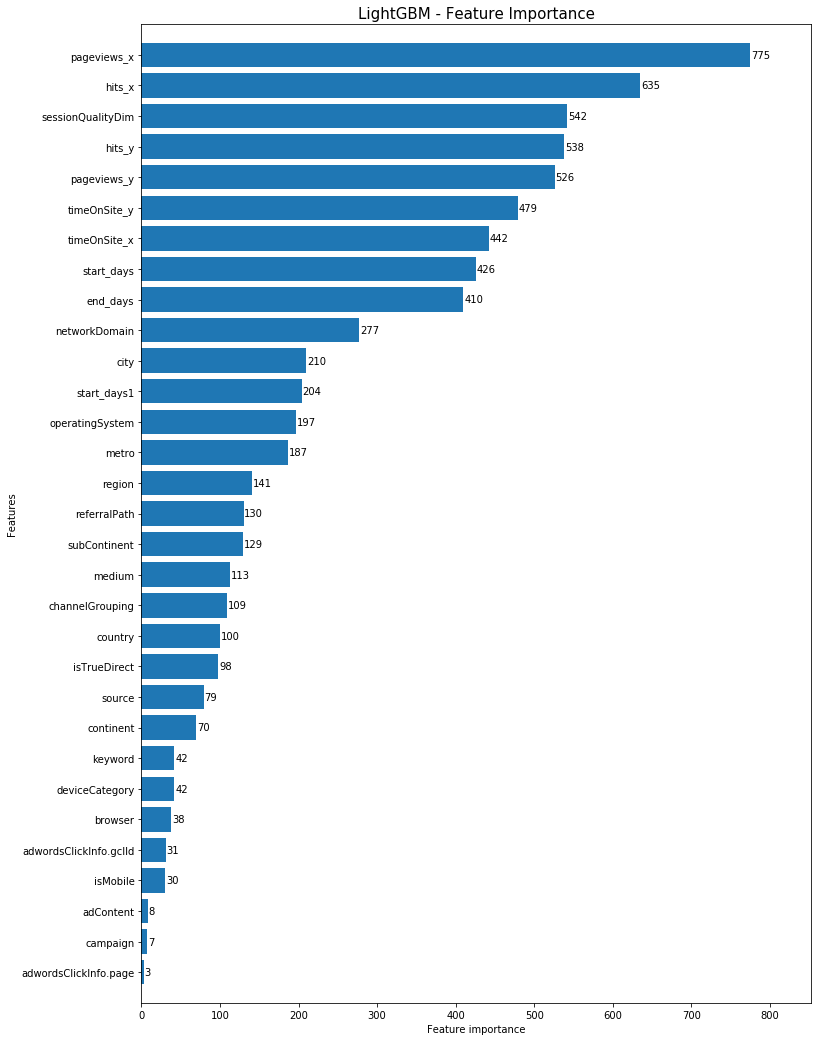

In [0]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()